# Portuguese Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "Portuguese"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity,entailment
0,1,Relembre-se que o atleta estava afastado dos r...,André Gomes entra em campo quatro meses depois...,3.50,None
1,2,O Sporting perdeu hoje com uma equipa muito ma...,O Sporting volta a perder com uma equipa russa...,3.50,None
2,3,"Cédric cruza para Tiago, que não chega a tempo.","Para os seus lugares, Cédric, Bruno Alves, Coe...",2.50,None
3,4,"Dessa forma, Turan só poderia ser inscrito em ...",Até Aleix Vidal e Arda Turan serem inscritos o...,1.50,None
4,5,Os pupilos orientados por Andrés Madrid empata...,A equipa orientada por Andrés Madrid ainda não...,3.00,None
5,6,Deolinda Rodrigues estava internada no hospita...,"Deolinda Rodrigues morreu este sábado, ao fina...",4.00,Entailment
6,7,"Em Agosto a dívida estava nos 229,1 mil milhõe...",Os 229 mil milhões de euros de endividamento p...,2.75,None
7,8,O BQ Aquaris X5 é o primeiro telemóvel da BQ a...,O Aquaris X5 é o primeiro da marca a ter eleme...,4.00,Entailment
8,9,Quem diz que Cavaco Silva é previsível está se...,Costa remeteu para Cavaco Silva qualquer decis...,1.25,None
9,10,Foram detidas esta manhã 14 pessoas por crimes...,Já foram detidas várias pessoas por suspeitas ...,4.00,Entailment


In [5]:
train.describe()

,id,similarity
count,2500.00000,2500.000000
mean,1250.50000,3.161100
std,721.83216,0.866298
min,1.00000,1.000000
25%,625.75000,2.500000
50%,1250.50000,3.000000
75%,1875.25000,4.000000
max,2500.00000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity,entailment
0,1,Mau tempo abate-se sobre o Algarve e inunda a ...,A baixa de Albufeira foi afetada pelo mau tempo.,4.00,Entailment
1,2,"Em comparação com o ano anterior, registaram-s...",Feita a comparação com igual período do ano pa...,5.00,Paraphrase
2,3,Presidente da República fez uma série de aviso...,Foi naquele local que António Costa tomou poss...,1.75,None
3,4,José Manuel da Silva reconheceu várias qualida...,"O novo ministro, Adalberto Campos Fernandes, g...",1.25,None
4,5,Recorde-se que Mel Gibson esteve casado com Ro...,"Aos 60 anos, Mel Gibson volta a encontrar o amor.",2.00,None
5,6,Algumas projeções apontam para a derrota do Pa...,"Escolher Eric Chu, o candidato do Kuomintang à...",1.75,None
6,7,Outra grande surpresa foi a eliminação de Venu...,"Venus Williams, de 35 anos, foi batida por 6-4...",2.50,None
7,8,Criador do Facebook anunciou esta terça-feira ...,"Sobre o nascimento da menina, o criador do Fac...",2.75,None
8,9,"Os M83, um projeto do músico francês Anthony G...",O francês Anthony Gonzalez tem um sonho: o M83...,2.75,None
9,10,Uma nova falha no fornecimento levou Portugal ...,Portugal teve de encomendar a vacina contra a ...,5.00,Paraphrase


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

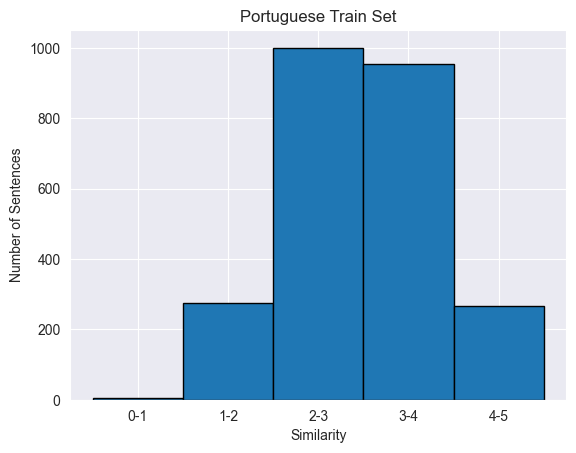

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

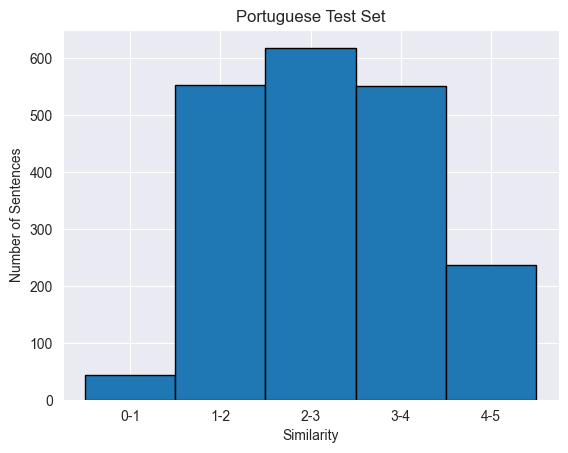

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

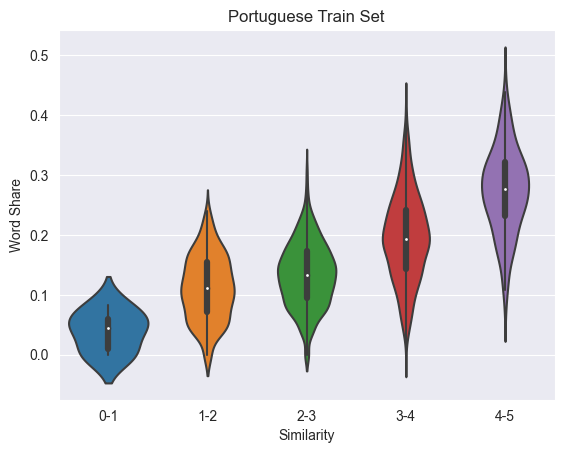

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

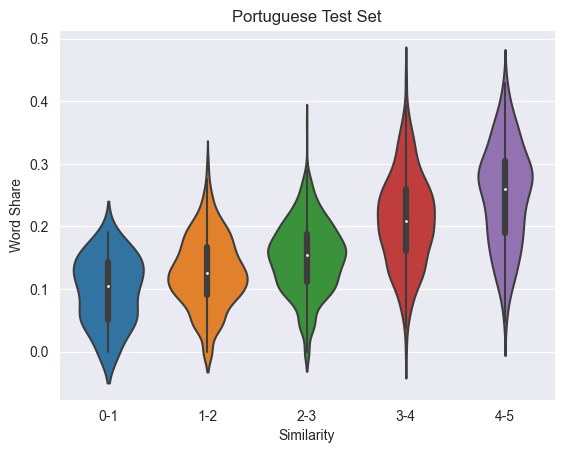

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,entailment,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,Relembre-se que o atleta estava afastado dos r...,André Gomes entra em campo quatro meses depois...,3.50,None,3-4,1,1,117,106,19,19,8.0,37,0.216216,2,0
1,2,O Sporting perdeu hoje com uma equipa muito ma...,O Sporting volta a perder com uma equipa russa...,3.50,None,3-4,1,1,60,76,10,14,5.0,22,0.227273,2,0
2,3,"Cédric cruza para Tiago, que não chega a tempo.","Para os seus lugares, Cédric, Bruno Alves, Coe...",2.50,None,2-3,1,1,47,70,9,11,1.0,20,0.050000,2,0
3,4,"Dessa forma, Turan só poderia ser inscrito em ...",Até Aleix Vidal e Arda Turan serem inscritos o...,1.50,None,1-2,1,1,54,68,9,12,1.0,21,0.047619,2,0
4,5,Os pupilos orientados por Andrés Madrid empata...,A equipa orientada por Andrés Madrid ainda não...,3.00,None,2-3,1,1,58,89,9,15,4.0,24,0.166667,2,0
5,6,Deolinda Rodrigues estava internada no hospita...,"Deolinda Rodrigues morreu este sábado, ao fina...",4.00,Entailment,3-4,1,1,105,83,17,14,7.0,31,0.225806,2,0
6,7,"Em Agosto a dívida estava nos 229,1 mil milhõe...",Os 229 mil milhões de euros de endividamento p...,2.75,None,2-3,1,1,126,100,23,18,4.0,36,0.111111,2,0
7,8,O BQ Aquaris X5 é o primeiro telemóvel da BQ a...,O Aquaris X5 é o primeiro da marca a ter eleme...,4.00,Entailment,3-4,1,1,78,74,17,15,9.0,29,0.310345,2,0
8,9,Quem diz que Cavaco Silva é previsível está se...,Costa remeteu para Cavaco Silva qualquer decis...,1.25,None,1-2,1,1,83,55,15,8,2.0,22,0.090909,2,0
9,10,Foram detidas esta manhã 14 pessoas por crimes...,Já foram detidas várias pessoas por suspeitas ...,4.00,Entailment,3-4,1,1,112,77,17,11,7.0,27,0.259259,2,0


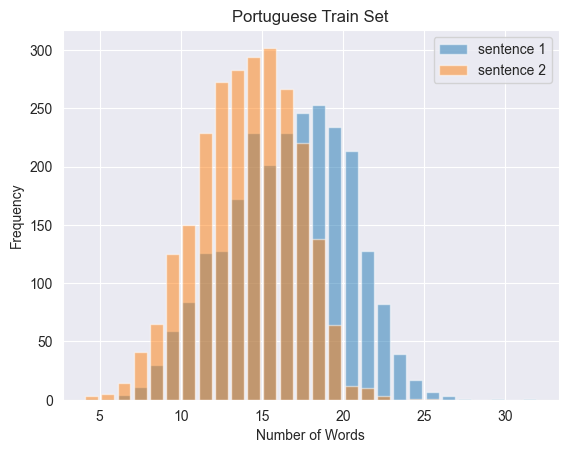

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

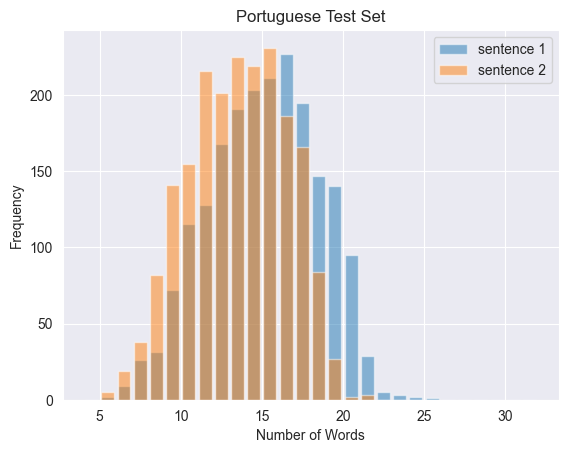

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,2500.00000,2500.000000,2500.0,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.0
mean,1250.50000,3.161100,1.0,1.0,95.493600,80.805600,16.137200,13.580000,4.870000,28.319200,0.169543,2.0,0.0
std,721.83216,0.866298,0.0,0.0,23.104828,19.036995,3.716221,3.031316,2.590866,4.803097,0.079823,0.0,0.0
min,1.00000,1.000000,1.0,1.0,30.000000,25.000000,4.000000,4.000000,0.000000,11.000000,0.000000,2.0,0.0
25%,625.75000,2.500000,1.0,1.0,79.000000,67.000000,14.000000,11.000000,3.000000,25.000000,0.111111,2.0,0.0
50%,1250.50000,3.000000,1.0,1.0,97.000000,81.000000,16.000000,14.000000,4.500000,28.000000,0.161290,2.0,0.0
75%,1875.25000,4.000000,1.0,1.0,111.250000,94.000000,19.000000,16.000000,6.000000,32.000000,0.218750,2.0,0.0
max,2500.00000,5.000000,1.0,1.0,188.000000,164.000000,31.000000,25.000000,21.000000,45.000000,0.466667,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0
mean,1000.500000,2.879875,1.0,1.0,86.865000,77.013500,14.61000,13.025000,4.581000,26.415000,0.170973,2.0,0.0
std,577.494589,1.054322,0.0,0.0,21.032617,18.586825,3.35418,3.018929,2.372183,4.618597,0.078483,0.0,0.0
min,1.000000,1.000000,1.0,1.0,29.000000,29.000000,5.00000,5.000000,0.000000,12.000000,0.000000,2.0,0.0
25%,500.750000,2.000000,1.0,1.0,72.000000,64.000000,12.00000,11.000000,3.000000,23.000000,0.115385,2.0,0.0
50%,1000.500000,2.750000,1.0,1.0,87.000000,77.000000,15.00000,13.000000,4.000000,26.000000,0.166667,2.0,0.0
75%,1500.250000,4.000000,1.0,1.0,102.000000,90.000000,17.00000,15.000000,6.000000,30.000000,0.218750,2.0,0.0
max,2000.000000,5.000000,1.0,1.0,159.000000,144.000000,25.00000,21.000000,15.000000,41.000000,0.444444,2.0,0.0
